# **GRIP - THE SPARKS FOUNDATION**
# <font color=WHITE>**DATA SCIENCE & BUSINESS ANALYTICS TASK**</font>

# **JEEVANKARTHICK B**

## **TASK - 1**
## <font color=WHITE>**PREDICTION USING SUPERVISED MACHINE LEARNING**</font>

### **PROBLEM STATEMENT** <br> 
#### <font color=WHITE> _Predict the percentage of a student based on the no. of study hours_</font>

### **FEATURE DESCRIPTION** <br> 
   #### <font color=WHITE>1. **HOURS**: _Number of hours student has studied in a day._</font> <br> 
   #### <font color=WHITE>2. **SCORES**: _Percentage of marks obtained by the student corresponding to the number of study hours._</font>

### **IMPORTING LIBRARIES**

In [1]:
# Import the basic libraries for data manupulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **UNDERSTANDING THE DATA**

In [2]:
# Reading the dataset

df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Statistical Summary of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### **DATA CHECKING**

In [4]:
# Checking for the Standard missing values

df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Checking for non-standard missing values for any characters like #,%,?.......

for i in df.columns:
    print("Unique values for the column:",i)
    print(np.unique(df[i]))

Unique values for the column: Hours
[1.1 1.5 1.9 2.5 2.7 3.2 3.3 3.5 3.8 4.5 4.8 5.1 5.5 5.9 6.1 6.9 7.4 7.7
 7.8 8.3 8.5 8.9 9.2]
Unique values for the column: Scores
[17 20 21 24 25 27 30 35 41 42 47 54 60 62 67 69 75 76 81 85 86 88 95]


Skew value for the columns:
Hours     0.190338
Scores    0.233965
dtype: float64


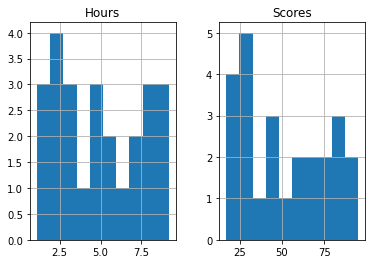

In [6]:
# Distribution Check

print("Skew value for the columns:")
print(df.skew())

df.hist()
plt.show()

### **VISUALIZATION**

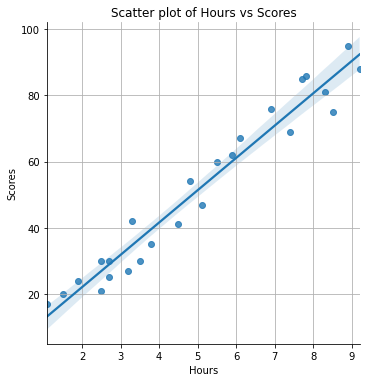

In [7]:
#1. lmplot Plot

sns.lmplot(x="Hours",y="Scores",data=df)
plt.title("Scatter plot of Hours vs Scores")
plt.grid()
plt.show()

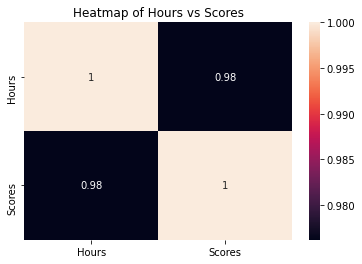

In [8]:
#2. Correlation plot(Heat map)

sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of Hours vs Scores")
plt.show()

In [10]:
# Defining the target as y and independent variable as X

X=df.drop("Scores",axis=1)
y=df["Scores"]
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


### **TEST AND TRAIN**

In [11]:
# Import train_test_split function from sci-kit learn
# Split in the ratio train:test=0.7:0.3

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

### **MODEL**

In [12]:
# Import LinearRegression modelfrom sci-kit learn
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression object
lr=LinearRegression()

# Fit the model on the train data
lr_fit=lr.fit(X_train,y_train)

# Prediction for train and test
pred_train=lr_fit.predict(X_train)
pred_test=lr_fit.predict(X_test)

In [13]:
# Checking r2_score

r2_score=lr_fit.score(X_train,y_train)
print("The R-Squared value: ",round(r2_score,3))

The R-Squared value:  0.962


In [15]:
# Let us now check the residual distribution

residual= y_test-pred_test
residual

22    -5.505500
21     3.537507
0     -6.561409
3    -12.303367
12    -6.475395
10     5.662227
6     -6.273263
11     0.584815
Name: Scores, dtype: float64

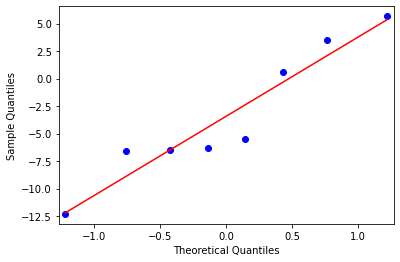

In [16]:
# Importing qqplot to plot residual distribution

from statsmodels.graphics.gofplots import qqplot

qqplot(residual,line="r")
plt.show()

Residual Skewness: 0.30288858393424045


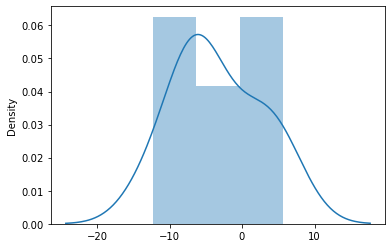

In [17]:
print("Residual Skewness:",residual.skew())
sns.distplot(x=residual)
plt.show()

### **PREDICTION**

In [18]:
hours_day=9.25
hours_day=np.array(hours_day).reshape(1, -1)
print("The predicted score if a student studies",hours_day[0][0],"hours in a day is:",round(lr_fit.predict(hours_day)[0],2))

The predicted score if a student studies 9.25 hours in a day is: 94.77
